In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt


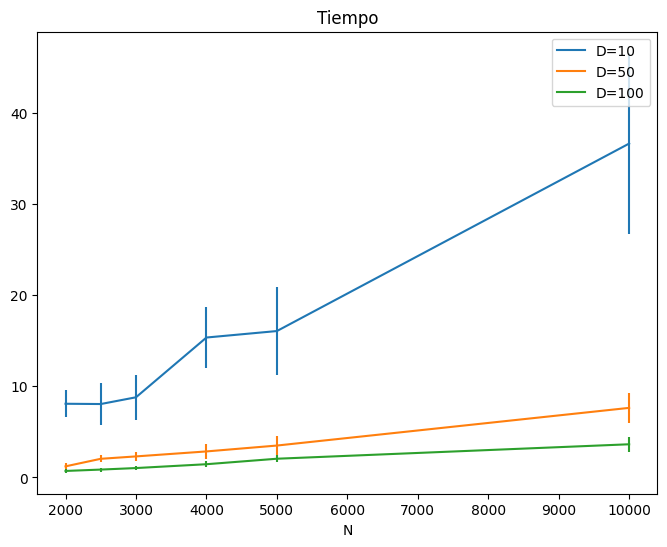

In [3]:
epsilon = 0.05

def get_first_equilibrium_frame(file):
    # results = pd.read_csv(file, header=1, names=cols)
    # results['proportion'] = results['left_particles'] / results['total_particles']
    # results['is_in_equilibrium'] = np.where((results['proportion'] < 0.5 + epsilon) & (0.5 - epsilon < results['proportion']), True, False)

    # return results[results['is_in_equilibrium'] == True].nsmallest(1, 'iteration').iloc[0]['iteration']
    # Testing purpouses vvv
    return random.randint(40, 100)

def get_files(dir):
    data = []

    cols = ["iteration", "left_particles", "total_particles"]
    for N in [2000, 2500, 3000, 4000, 5000, 10000]:
        for D in [10, 50, 100]:
            for i in range(0, 10):
                first_equilibrium_frame = get_first_equilibrium_frame(f"results/results{i}.csv") / D * (N / 2000)

                data.append({ 'simulation': i, 'equilibrium_frame': first_equilibrium_frame, 'N': N, 'D': D })
    
    return data

data = get_files('')
df = pd.DataFrame.from_records(data)
N = { x['N'] for x in data }
D = { x['D'] for x in data }

fig, ax = plt.subplots(figsize=(8,6))

for d in sorted(D):
    df2 = df[df['D'] == d]\
        .groupby(['N'])\
        .agg([np.mean, np.std])['equilibrium_frame']\
        .plot(kind='line', y = "mean", label=f"D={d}", yerr = "std", title = f"Tiempo", ax=ax)